# Chapter 3 Equilibrium of a Particle

## Section 3.1 Condition for the Equilibrium of a Particle
* Equilibrium - a particle is in equilibrium if it stays at rest if originally at rest, or has a constant velocity if originally in motion
* Maintaining Equilibrium - needs to satisfy Newton's first law of motion, $\sum \vec F = 0$, this is sufficient since $\sum \vec F = m \vec a$, therefore $\vec a = 0$, therefore constant velocity

## Section 3.2 The Free-Body Diagram
* Free-Body Diagram - drawing that shows the particle with all the forces that act on it
* Springs
    * linearly elastic spring of unreformed length $l_0$ is used to support a particle, the length of the spring will change directly proportionally to $\vec F$ acting on it.
    * spring constant or stiffness (denoted $k$) - characteristic that defined the elasticity of a spring
    * magnitude of force exerted on a linearly elastic spring can be expressed as $F = ks$, where $k$ is the stiffness, $s$ is the deformed distance, $s = l - l_0$, if $s$ is positive it is an elongation and $\vec F$ must pull on the sting, if $s$ is negative it causes a shortening then $\vec F$ must push on it.
* Cables and Pulleys
    * Cables will be assumed to have negligible weight and cannot stretch
    * Cables can only support a tension force, and this force always acts in direction of the cable
    * Tension force must have a constant magnitude to keep it in equilibrium when the cable is continuous, and it passes over a frictionless pulley
* Smooth Contact
    * When an object rests on a smooth surface, then the surface will exert a force on the object that is normal to the surface at the point of contact, denoted $\vec N$

## Section 3.3 Coplanar Force Systems
* Equilibrium in 2D - $\sum \vec F = 0 = \sum F_x \hat i + \sum F_y \hat j = 0$, i.e. $\sum F_x \hat i = 0$ and $\sum F_y \hat j = 0$
* If a force has an unknown magnitude the direction of force can be assumed, but if the solution produces a negative scalar then the force is opposite to what it was assumed.

## Problem 39
The ball $D$ has a mass of 20 kg. If a force of $F = 100 \mathrm N$
is applied horizontally to the ring at $A$, determine the
dimension $d$ so that the force in cable $AC$ is zero.
<img src="pictures\problem_3_39.png" width="330"/>


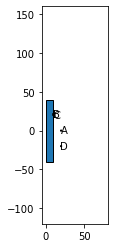

In [14]:
import string
import numpy as np
from matplotlib.patches import FancyArrow, Rectangle, Circle
import matplotlib.pyplot as plt
figure, axes = plt.subplots()

wall_length = 8
wall_thickness = 1
d_1 = 2
theta = np.arctan(0.5 * wall_length/d_1)
alpha = np.arctan((0.5 * wall_length + 1.5)/d_1)

wall = Rectangle((0,-1/2 * wall_length),wall_thickness,wall_length,edgecolor='black',facecolor='tab:blue')
axes.add_patch(wall)

point_labels = list(string.ascii_uppercase)[:4]
point_positions = [(d_1,0),(wall_thickness,d_1 + 1.5),(wall_thickness,d_1),(d_1,-d_1)]
point_orientation = ['right','right','right','right']
for label,point,orientation in zip(point_labels,point_positions,point_orientation):
    dot = Circle(point, radius=0.01 * wall_length, fill=True, color='black')
    axes.add_patch(dot)
    if orientation=='top':
        plt.text(point[0],point[1],label,va='bottom',ha='center')
    elif orientation=='bottom':
        plt.text(point[0],point[1],label,va='top',ha='center')
    elif orientation=='left':
        plt.text(point[0] - 0.05 * wall_length,point[1],label,va='center',ha='center')
    elif orientation=='right':
        plt.text(point[0] + 0.05 * wall_length,point[1],label,va='center',ha='center')
    else:
        plt.text(point[0],point[1],label,va='center',ha='center')
vectors = {
    'F': {'origin': np.array([d_1,0]), 'vector': np.array([10,0])},
    'F_AC': {'origin': np.array([d_1,0]), 'vector': np.array([np.cos(theta),np.sin(theta)])},
    'F_AB': {'origin': np.array([d_1,0]), 'vector': np.array([np.cos(alpha),np.sin(alpha)])},
}
axes.set_xlim([-0.5 * wall_thickness, wall_length + 1])
axes.set_ylim([-wall_length * 1.5,2 * wall_length])

for label, vector_dictionary in vectors.items():
    origin = vector_dictionary['origin']
    vector = vector_dictionary['vector']
    vector_arrow = FancyArrow(origin[0], origin[1], vector[0], vector[1],
    width=.02,length_includes_head=True, color='k')
    # axes.text(origin[0] + 0.5*vector[0] - 0.05 * wall_length,
    #           origin[1] + 0.5*vector[1],
    #           r'$\vec{'+label[0]+r'}' + label[1:] + r'$', color='k', fontsize=14,
    #           va='center',ha='right'
    #                           )
    #axes.add_patch(vector_arrow)

axes.set_aspect('equal')
#axes.axis('off')
plt.show()

## Solution
$\begin{array}{ll}
\sum F_x &= F-F_{AB} \cos \theta = 0 \\
\Rightarrow F_{AB}   &= \frac{F}{\cos\theta} \\
\sum F_y &= F_{AB} \sin \theta - mg = 0  \\
\Rightarrow \frac{F}{\cos\theta} \sin\theta = mg \\
\Rightarrow \tan\theta = \frac{mg}{F}\\
\end{array}$

In [5]:
from astropy.constants import g0
import numpy as np
mass = 20
force = 100
wall_distance = 2
hook_separation = 1.5
theta = np.arctan(mass * g0.value / force)
d = wall_distance * np.tan(theta) -hook_separation
print(f'd = {d:.2f} m')

d = 2.42 m


## Section 3.4 Three-Dimensional Force Systems
* Equilibrium in 3D - $\sum \vec F = 0 = \sum F_x \hat i + \sum F_y \hat j + \sum F_z \hat k = 0$, i.e. $\sum F_x \hat i = 0$, $\sum F_y \hat j = 0$, and $\sum F_z \hat k =0$
* Procedure for analysis - set up Free-Body Diagram, solve for $F_x, F_y, F_z$, flip direction of force if solution produces a negative result

## Problem 46
Determine the stretch in each of the two springs
required to hold the 20-kg crate in the equilibrium position
shown. Each spring has an unstretched length of 2 m and a
stiffness of k = 300 N/m
<img src="pictures/problem_3_46.png" width="512"/>


In [6]:
from astropy.constants import g0
import numpy as np
stiffness = 300
mass = 20
position_vector = np.array((6,4,12))
magnitude_OC = np.linalg.norm(position_vector)
unit_vector = position_vector / magnitude_OC
force_crate = np.array((0,0,mass * -g0.value))
#F_OC +#F_OA + #F_OB + #F = 0
F_OC = -force_crate[2]/unit_vector[2]  #z
F_OA = unit_vector[1] * F_OC  #y
F_OB = unit_vector[0] * F_OC  #x
s_OB = F_OB / stiffness
s_OA = F_OA /stiffness
print(f'stretch of spring OA = {s_OA:.3f} m')
print(f'stretch of spring OB = {s_OB:.3f} m')

stretch of spring OA = 0.218 m
stretch of spring OB = 0.327 m
